In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("D:/IT/sem 5/ML/practical/Admission_Predict.csv")


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
from sklearn.preprocessing import Binarizer


In [10]:
bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])


In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [15]:
x = df.drop('Chance of Admit ', axis =1)
y = df['Chance of Admit ']


In [17]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [19]:
y= y.astype('int')

In [21]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

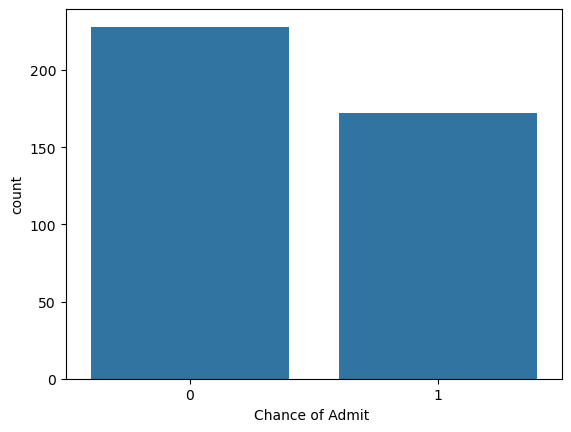

In [23]:
sns.countplot(x=y)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size =0.2)

In [27]:
x_train.shape


(320, 8)

In [29]:
x_test.shape


(80, 8)

In [31]:
y_train.shape

(320,)

In [33]:
y_test.shape


(80,)

In [35]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
classifier = DecisionTreeClassifier(random_state=0)


In [39]:
classifier.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [41]:
y_pred = classifier.predict(x_test)


In [43]:
result = pd.DataFrame({'actual' : y_test,'predicted':y_pred})

In [45]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [49]:
from sklearn.metrics import classification_report

In [51]:
accuracy_score(y_test,y_pred)

0.9

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,labels = classifier.classes_)


In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = classifier.classes_)

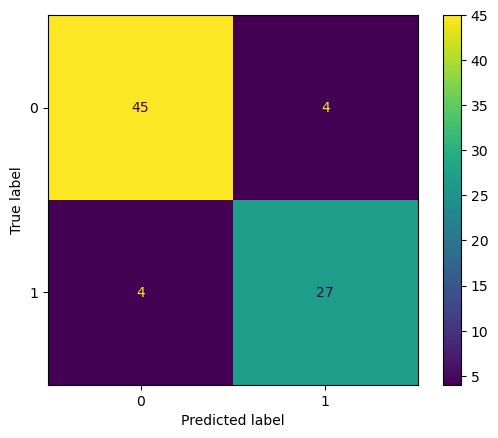

In [57]:
disp.plot()


In [59]:
accuracy_score(y_test, y_pred)

0.9

In [61]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.87      0.87      0.87        31

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [63]:
new = [[140,300,110,5,4.5,4.5,9.2,1]]


In [65]:
classifier.predict(new)[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

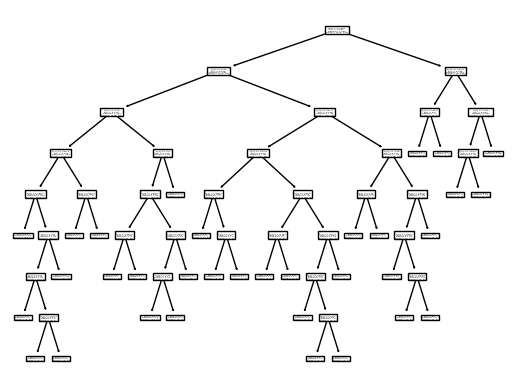

In [67]:
from sklearn.tree import plot_tree
plot_tree(classifier, );


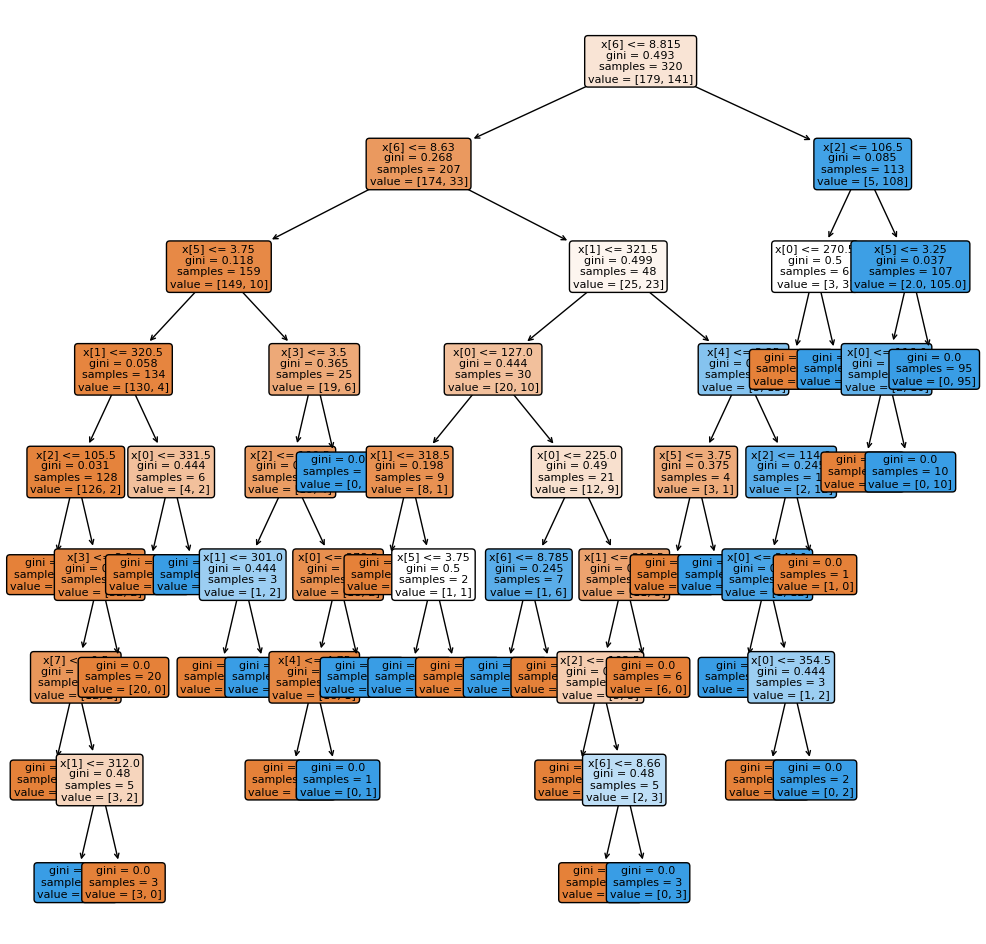

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(classifier, fontsize=8, filled=True, rounded = True);

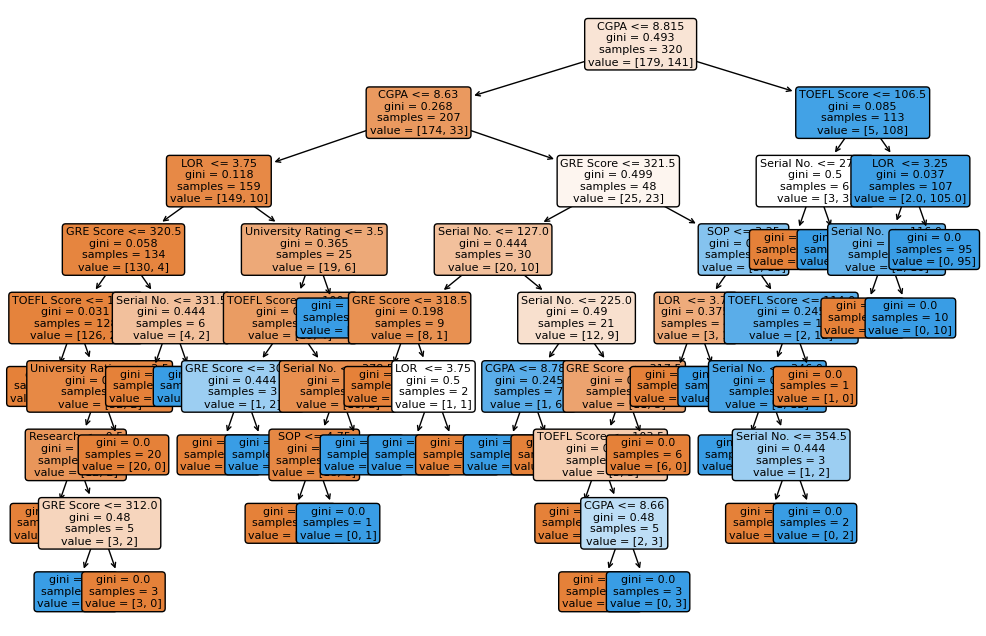

In [69]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, fontsize=8, filled=True, rounded=True, feature_names=x.columns)
plt.show()